# LIVER CIRRHOSIS PREDICTION

![Alt text](https://media.healthdirect.org.au/images/inline/original/cirrhosis-liver-illustration-1b49f2.jpg)

## Context

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism. The following data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

# About Data 🗄
The data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting
Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

### Content:

<body>
    <h3>Dataset columns and definition</h3>
	<table>
		<thead>
			<tr>
                <th><u>Feature</u></th>
                <th><u>Description</u></th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>ID</td>
				<td>Unique identifier.</td>
			</tr>
			<tr>
				<td>N_Days</td>
				<td>number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986.</td>
			</tr>
			<tr>
				<td>Status</td>
				<td>status of the patient C (censored), CL (censored due to liver tx), or D (death).</td>
			</tr>
			<tr>
				<td>Drug</td>
				<td>type of drug D-penicillamine or placebo.</td>
			</tr>
			<tr>
				<td>Age</td>
				<td>age in [days.</td>
			</tr>
			<tr>
				<td>Sex</td>
				<td>M (Male) or F (Female).</td>
			</tr>
			<tr>
				<td>Ascites</td>
				<td>presence of ascites N (No) or Y (Yes).</td>
			</tr>
			<tr>
				<td>Hepatomegaly</td>
				<td>presence of hepatomegaly N (No) or Y (Yes).</td>
			</tr>
			<tr>
				<td>Spiders</td>
				<td>presence of spiders N (No) or Y (Yes).</td>
			</tr>
			<tr>
				<td>Edema</td>
				<td>presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy).</td>
			</tr>
			<tr>
				<td>Bilirubin</td>
				<td>serum bilirubin in [mg/dl].</td>
			</tr>
			<tr>
				<td>Cholesterol</td>
				<td>serum cholesterol in [mg/dl].</td>
			</tr>
			<tr>
				<td>Albumin</td>
				<td>albumin in [gm/dl].</td>
			</tr>
			<tr>
				<td>Copper</td>
				<td>urine copper in [ug/day].</td>
			</tr>
			<tr>
				<td>Alk_Phos</td>
				<td>alkaline phosphatase in [U/liter].</td>
			</tr>
			<tr>
				<td>SGOT</td>
				<td>SGOT in [U/ml].</td>
			</tr>
			<tr>
				<td>Triglycerides</td>
				<td>triglicerides in [mg/dl].</td>
			</tr>
			<tr>
				<td>Platelets</td>
				<td>platelets per cubic [ml/1000].</td>
			</tr>
			<tr>
				<td>Prothrombin</td>
				<td>prothrombin time in seconds [s].</td>
			</tr>
			<tr>
				<td>Stage</td>
				<td>histologic stage of disease (1, 2, 3, or 4).</td>
			</tr>
        </tbody>
	</table>
</body>

### Importing required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from colorama import Fore, Back, Style

# Load the dataset.

In [2]:
df = pd.read_csv(r"D:\cirrhosis.csv", index_col='ID')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [3]:
#Checking the Shape of our dataset.
df.shape

(418, 19)

We can see that we have 418 records and 19 columns in our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

**We can see that we have 19 columns in our dataset.**  
These features are related to the patient’s details like age, sex, etc. and patient’s blood tests like prothrombin, triglycerides, platelets levels, etc. All these factors help in understanding a patient’s chances of liver cirrhosis.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


## Checking Missing values 

In [6]:
df.isnull().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [7]:
#Checking columns names available in our dataset.
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [8]:
# Handling Missing Value for Numerical Column
# Imputing Missing With Median
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Verify that there are no more missing values in numeric columns

missing_values_after_filling = df[numeric_columns].isnull().sum()

In [9]:
# Checking null values For Categorical column.
df.select_dtypes(include=('object')).isnull().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [10]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)
    
df.select_dtypes(include=('object')).isnull().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

In [11]:
# Checking Unique values
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'N_Days': [ 400 4500 1012 1925 1504 2503 1832 2466 2400   51 3762  304 3577 1217
 3584 3672  769  131 4232 1356 3445  673  264 4079 4127 1444   77  549
 4509  321 3839 4523 3170 3933 2847 3611  223 3244 2297 4467 1350 4453
 4556 3428 4025 2256 2576 4427  708 2598 3853 2386 1000 1434 1360 1847
 3282 4459 2224 4365 4256 3090  859 1487 3992 4191 2769 4039 1170 3458
 4196 4184 4190 1827 1191   71  326 1690 3707  890 2540 3574 4050 4032
 3358 1657  198 2452 1741 2689  460  388 3913  750  130 3850  611 3823
 3820  552 3581 3099  110 3086 3092 3222 3388 2583 2504 2105 2350  980
 3395 3422 3336 1083 2288  515 2033  191 3297  971 3069 2468  824 3255
 1037 3239 1413  850 2944 2796 3149 3150 3098 2990 1297 2106 3059 3050
 2419  786  943 2976 2615 2995 1427  762 2891 2870 1152 2863  140 2666
  853 2835 2475 1536 2772 2797  186 2055 1077 2721 1682 2713 1212 2692
 2574 2301 2657 2644 2624 1492 2609 2580 2573 2563 2556 2555 2241  974
 2527 1576  733 2332 2456  216 2443  797 24

**Alright now our dataset contains no missing values**

# Exploratory Data Analysys

First lets take a look at how many examples per calss do we have in our dataset.

In [12]:
df['Stage'].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

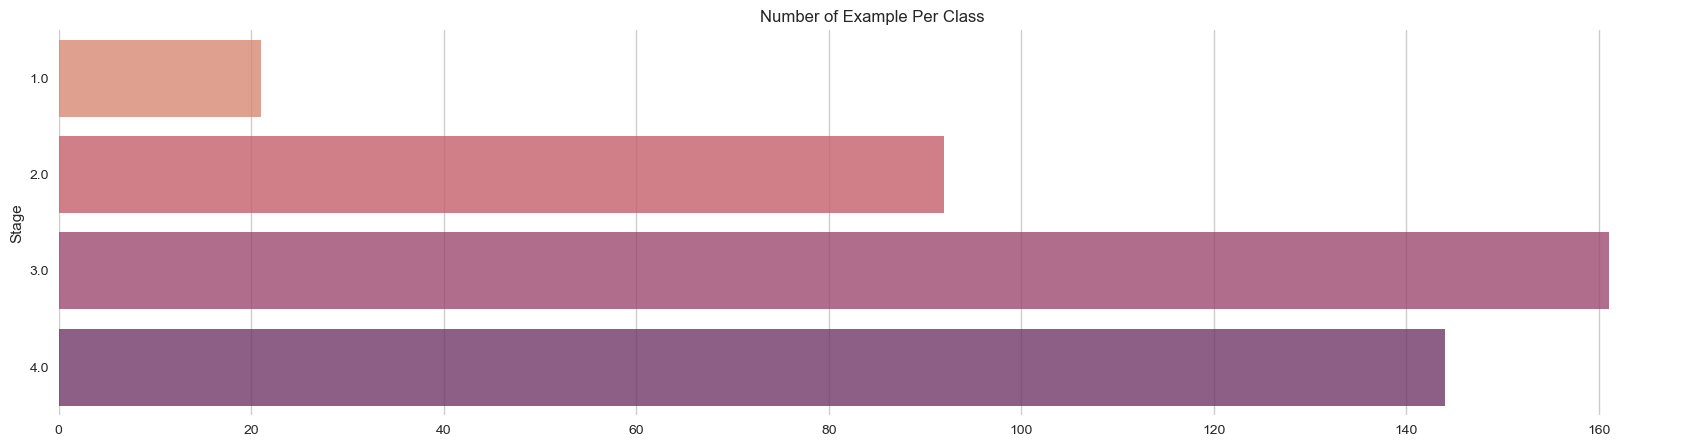

In [13]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class');

As we can observe we have class imbalances in our dataset i.e some classes have more examples than other. This could make it difficult for our model to train and achieve desired score. No worries, we can fix that later.

# Setting up Target and Features

### For this demonstration we will keep things simple by predicting one of the two classes  i.e (Cirrhosis and No Cirrhois).

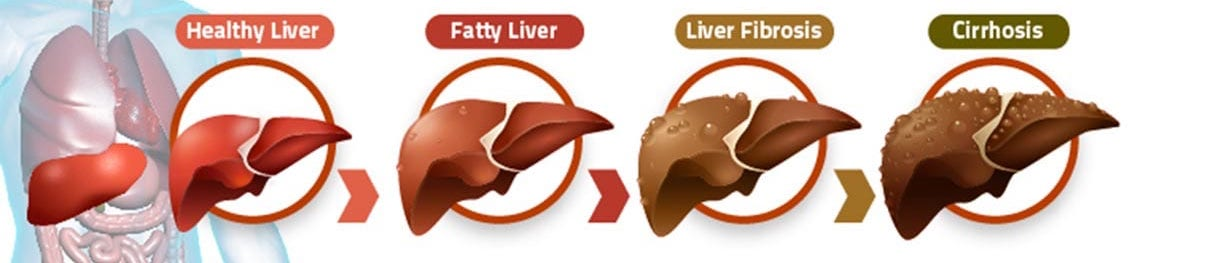

In [14]:
# Converting Target categories into integers 1 for Cirrhosis, 0 otherwise
df['Stage'] = np.where(df['Stage'] == 4,1,0)

We replaced stage 4 cirrhosis with 1 and everything else with 0

## Lets observe some Features with their relation with the disease

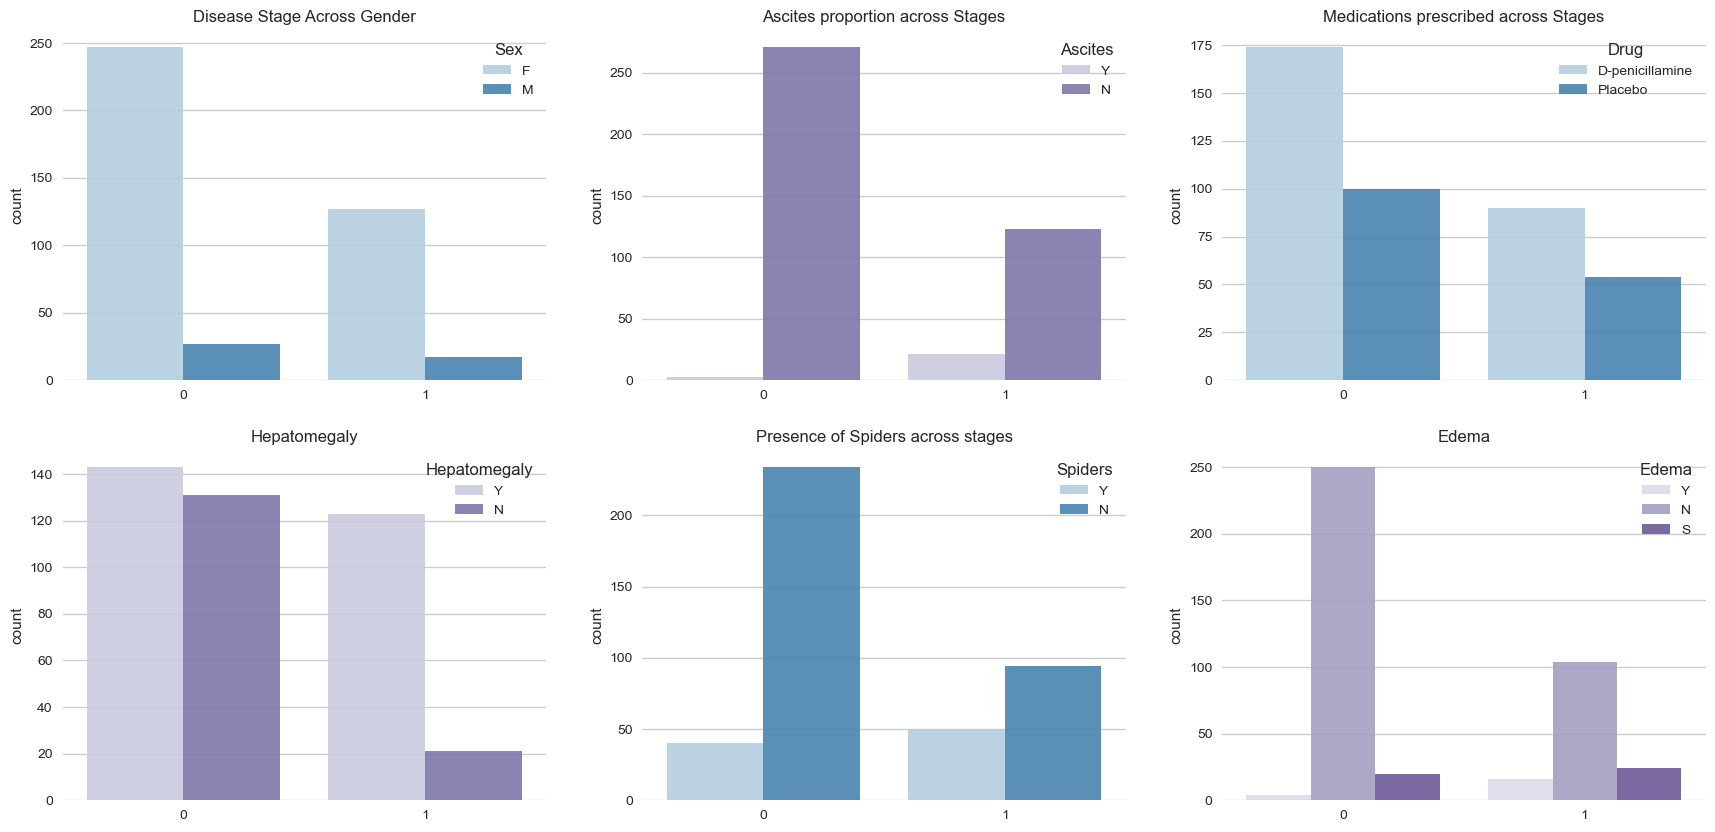

In [15]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');

plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');

There are some interesting insights if we observe closely. Take the case at Ascites, we observe that the risk of disease is higher with increase in Ascites, also presence of spiders has a positive relation with disease risk.

# Visualising the data distributed across

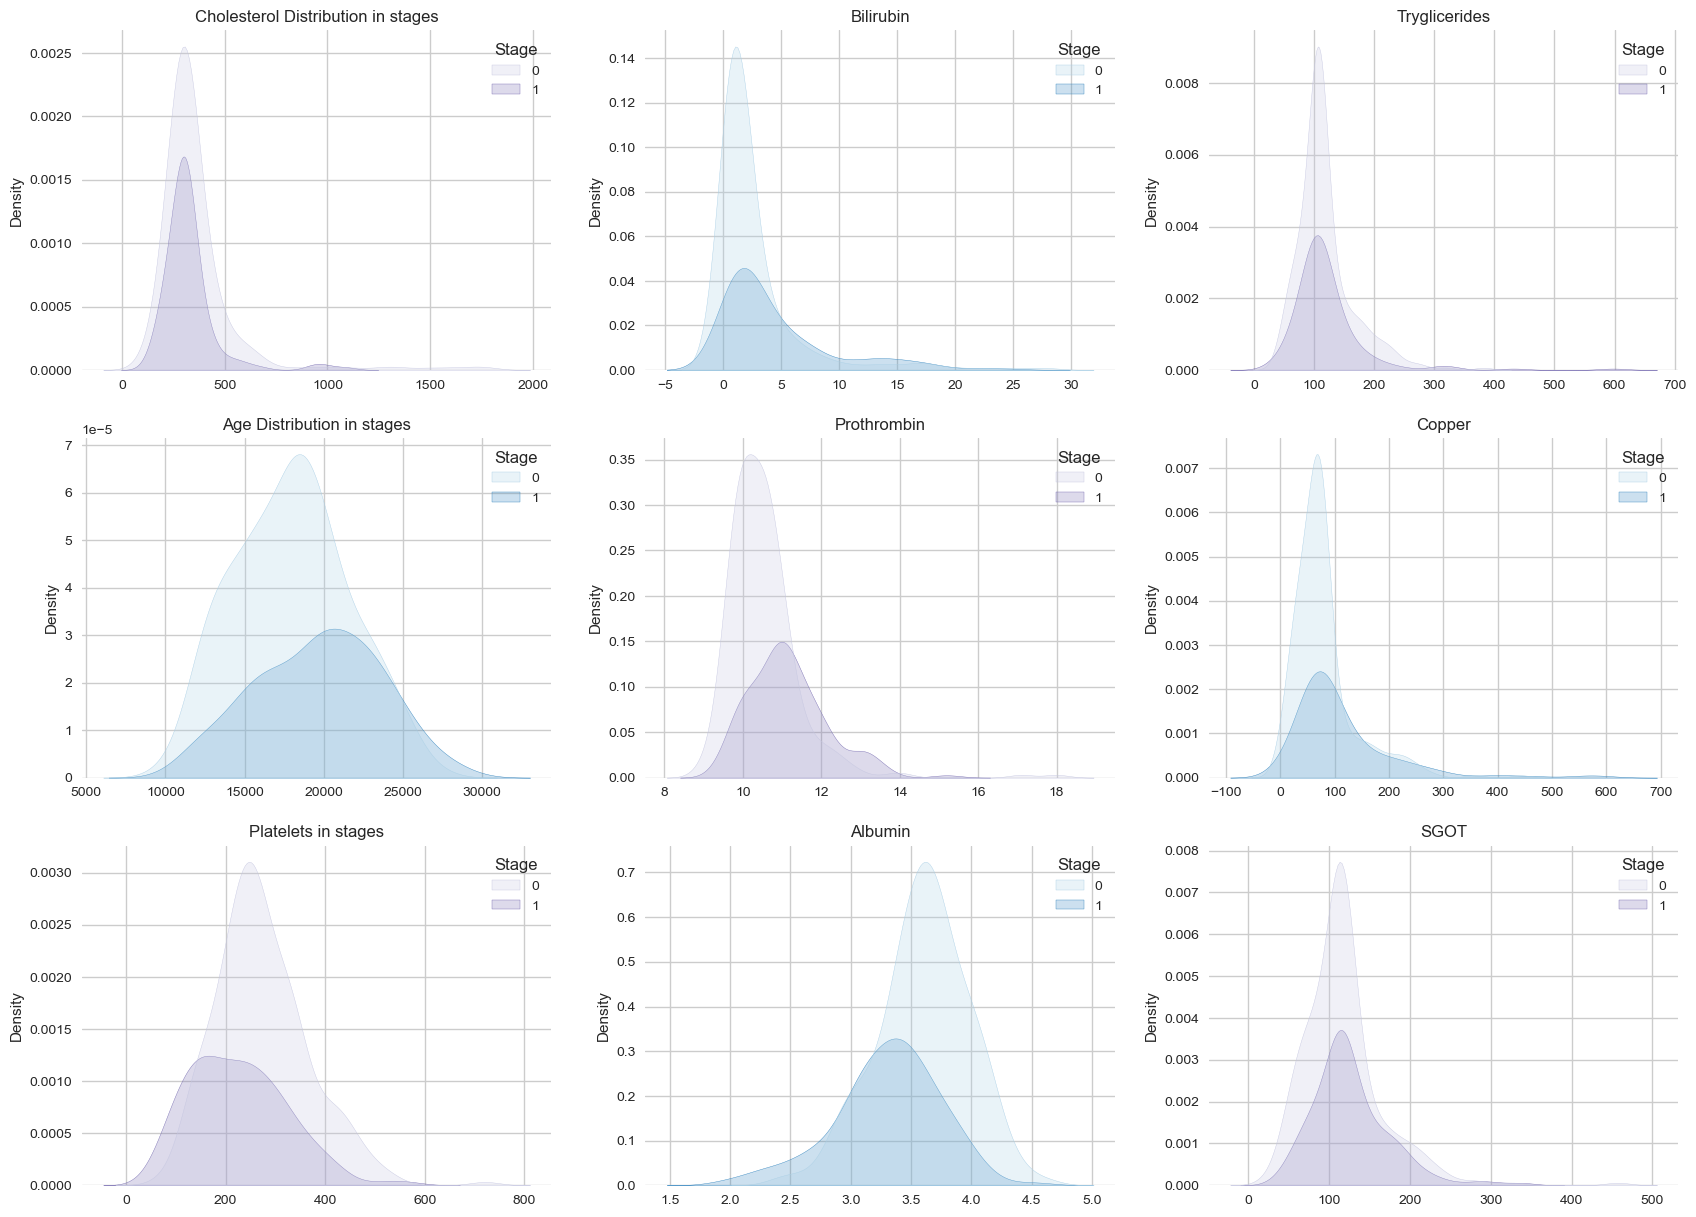

In [16]:
#Distribution Polts
plt.figure(figsize=(20.6,15))

plt.subplot(3,3,1)
sns.kdeplot(x=df['Cholesterol'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages');

plt.subplot(3,3,2)
sns.kdeplot(x=df['Bilirubin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin');

plt.subplot(3,3,3)
sns.kdeplot(x=df['Tryglicerides'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides');

plt.subplot(3,3,4)
sns.kdeplot(x=df['Age'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages');

plt.subplot(3,3,5)
sns.kdeplot(x=df['Prothrombin'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin');

plt.subplot(3,3,6)
sns.kdeplot(x=df['Copper'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper');

plt.subplot(3,3,7)
sns.kdeplot(x=df['Platelets'], hue=df['Stage'], fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets in stages');

plt.subplot(3,3,8)
sns.kdeplot(x=df['Albumin'], hue=df['Stage'], fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin');

plt.subplot(3,3,9)
sns.kdeplot(x=df['SGOT'], hue=df['Stage'], fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT');

Looking at the feature distribution we can observe that in features such as Age, Prothrombin, Copper the risk of the disease increase with increase in feature value, thus having a positive co-relation on with the disease probability.  
Lets fit a regression line to check.

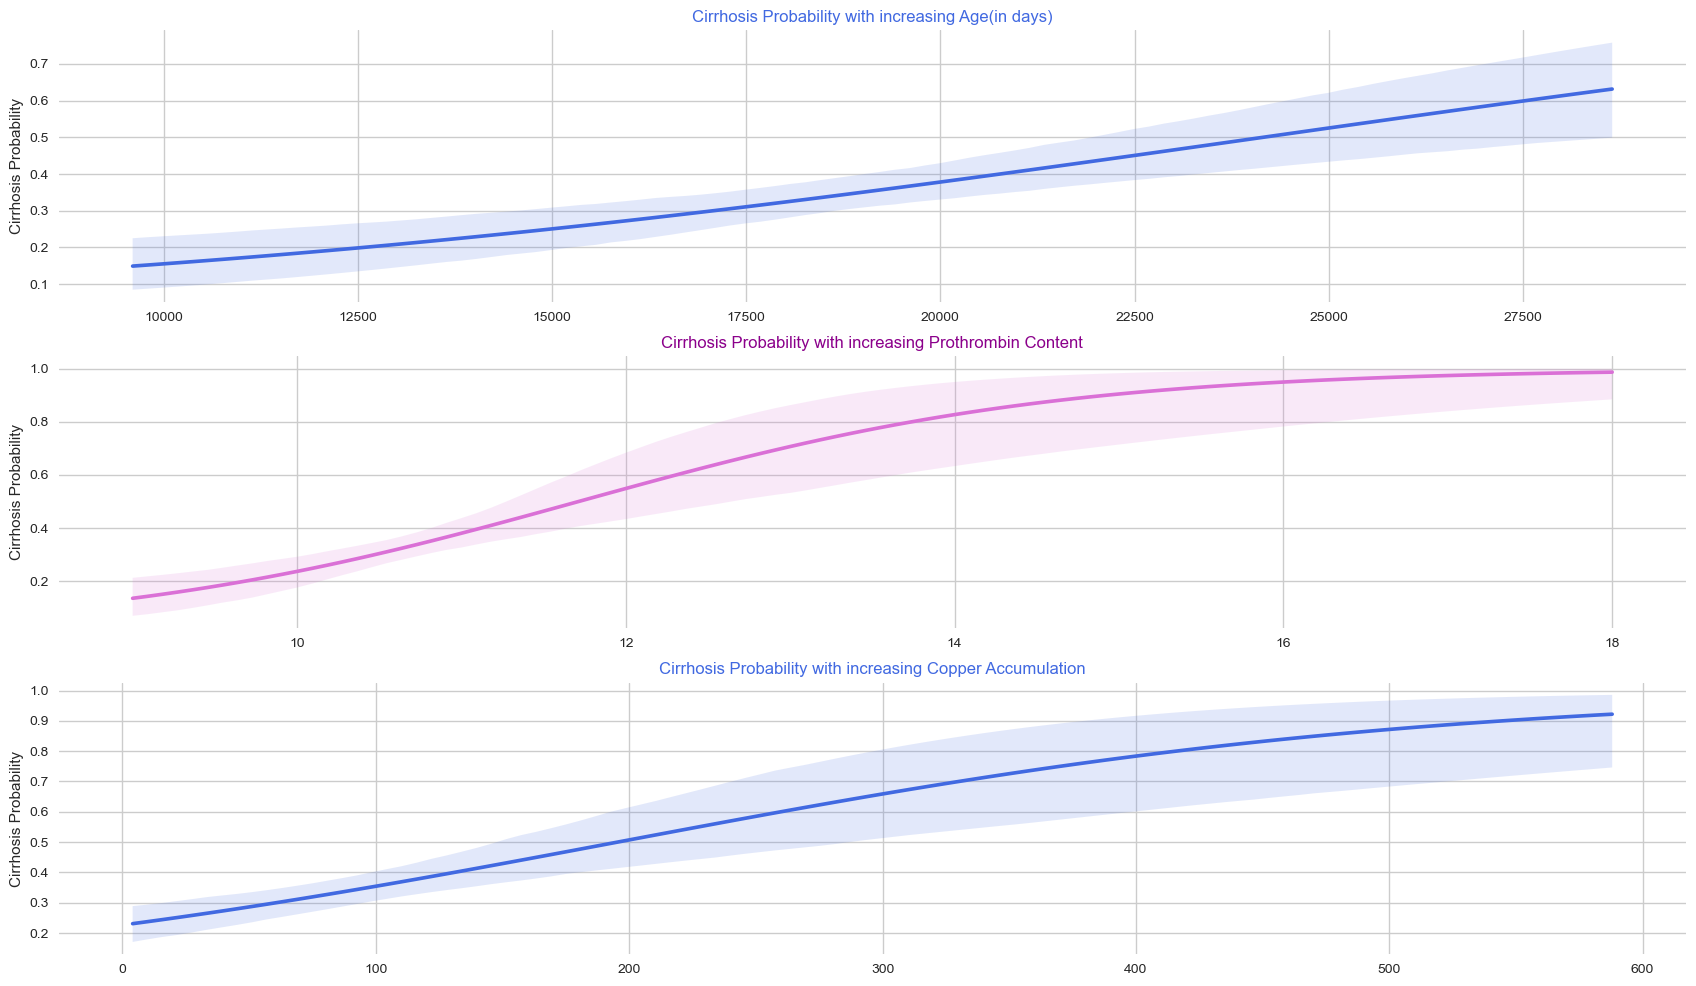

In [17]:
#Regression Plots of Positive Correlated Features.
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Age'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Age(in days)'), color='royalblue') ;

plt.subplot(3,1,2)
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=True, color='orchid');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Prothrombin Content'), color='darkmagenta');

plt.subplot(3,1,3)
sns.regplot(x=df['Copper'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Copper Accumulation'), color='royalblue') ;

Looks like the data checks with our intuition. These parameters indeed increase the risk of the disease.

### We can also observe some features such as Platelets, Albumin, Cholesterol where the probability of disease decrease with increase in feature value. Lets tally that with some more regression plots.

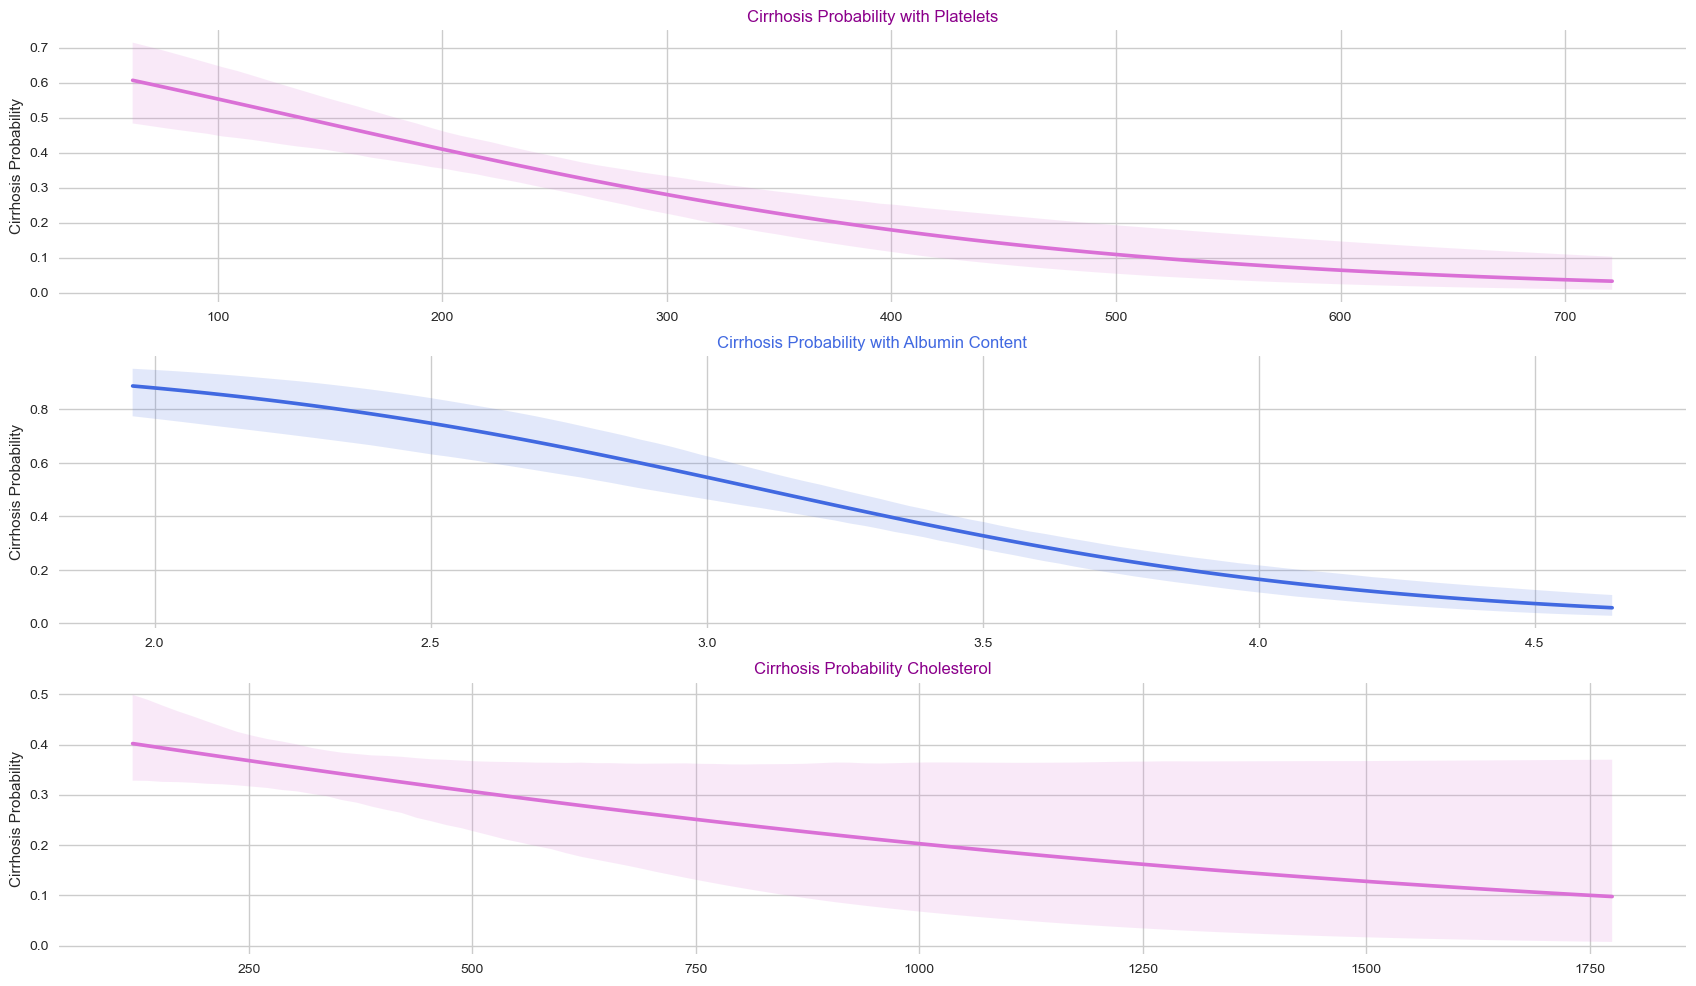

In [18]:
#Regression Plots of negatively correlated Features.
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Platelets'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Platelets'), color='darkmagenta');

plt.subplot(3,1,2)
sns.regplot(x=df['Albumin'], y=df['Stage'], scatter=False, logistic=True, color='royalblue');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Albumin Content'), color='royalblue');

plt.subplot(3,1,3)
sns.regplot(x=df['Cholesterol'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability Cholesterol'), color='darkmagenta') ;

Platelets, Albumin checks with our logic the findings about Cholesterol seems interesting! Looks like people with high Cholesterol have lower risk of Cirrhosis, this might not sound correct but our data certainly shows so. 

This should help our model predict the target. We will be looking at what features contribute the most in later part of the project.

# Preprocessing the data

In [19]:
# replacing categorical data with integers.
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1   
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1   
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # C : 0,CL : 1, D : -1  

In [20]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,-1,0,21464,1,1,1,1,1,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,1
2,4500,0,0,20617,1,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,0
3,1012,-1,0,25594,0,0,0,0,-1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,1
4,1925,-1,0,19994,1,0,1,1,-1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,1
5,1504,1,1,13918,1,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,0


## Setting target variable & also droping irrelevent column.

In [21]:
# Setting up Features and Target
X = df.drop(['Status', 'N_Days', 'Stage'], axis=1)
Y= df.pop('Stage')

In [22]:
#print(X)

In [23]:
print(Y)

ID
1      1
2      0
3      1
4      1
5      0
      ..
414    0
415    1
416    0
417    0
418    1
Name: Stage, Length: 418, dtype: int32


In [24]:
scaler= StandardScaler()

scaler.fit(X)
X=scaler.transform(X)

In [25]:
#Split the data into test and train
X_train, X_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(334, 16)
(334,)
(84, 16)
(84,)


In [27]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1]


# Model 

In [28]:
# Creating a function that trains, predicts and returns accuracy, recall confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def Train_Predict(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(f"Confusuion Matrix")

  cfm = confusion_matrix(y_test,y_pred)
  print(cfm)
  print("===================================================")
  print("Classification report")

  print(classification_report(y_test,y_pred))

  print("====================================================")
  acc = accuracy_score(y_test,y_pred)
  print("Accuracy of the model: ", acc)

  return y_pred

### Logistic Regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
model_LogisticRegression=LogisticRegression()
Train_Predict(model_LogisticRegression, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[46  9]
 [13 16]]
Classification report
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        55
           1       0.64      0.55      0.59        29

    accuracy                           0.74        84
   macro avg       0.71      0.69      0.70        84
weighted avg       0.73      0.74      0.73        84

Accuracy of the model:  0.7380952380952381


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1])

### Adjustment of threshold

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


y_pred_proba = classifier.predict_proba(X_test)
y_pred_proba

array([[0.66677478, 0.33322522],
       [0.28481013, 0.71518987],
       [0.75668152, 0.24331848],
       [0.94841634, 0.05158366],
       [0.4597643 , 0.5402357 ],
       [0.91196062, 0.08803938],
       [0.47751631, 0.52248369],
       [0.64948658, 0.35051342],
       [0.79040433, 0.20959567],
       [0.50717739, 0.49282261],
       [0.93475114, 0.06524886],
       [0.98581346, 0.01418654],
       [0.38552695, 0.61447305],
       [0.65892724, 0.34107276],
       [0.67427153, 0.32572847],
       [0.94309207, 0.05690793],
       [0.87821795, 0.12178205],
       [0.71134693, 0.28865307],
       [0.95396338, 0.04603662],
       [0.906656  , 0.093344  ],
       [0.07004589, 0.92995411],
       [0.71612369, 0.28387631],
       [0.93636076, 0.06363924],
       [0.93763141, 0.06236859],
       [0.13957102, 0.86042898],
       [0.96353431, 0.03646569],
       [0.10793241, 0.89206759],
       [0.16734552, 0.83265448],
       [0.84084354, 0.15915646],
       [0.27383641, 0.72616359],
       [0.

In [31]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_proba[:,1] > a, 1, 0)
    cfm=confusion_matrix(y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
          cfm[1,0]," , type 1 error:", cfm[0,1])

#While fixing the best threshold the focus should be on minimizing the total error compare to 0.5 threshhold
#out of those thresholds which show a lower error we should try chosing such a threshold where the type 2 error is lower
#priority should be given to Total error then type 2 error

Errors at threshold  0.4 : 21  , type 2 error : 10  , type 1 error: 11
Errors at threshold  0.41000000000000003 : 22  , type 2 error : 11  , type 1 error: 11
Errors at threshold  0.42000000000000004 : 22  , type 2 error : 11  , type 1 error: 11
Errors at threshold  0.43000000000000005 : 22  , type 2 error : 11  , type 1 error: 11
Errors at threshold  0.44000000000000006 : 22  , type 2 error : 11  , type 1 error: 11
Errors at threshold  0.45000000000000007 : 22  , type 2 error : 11  , type 1 error: 11
Errors at threshold  0.4600000000000001 : 23  , type 2 error : 12  , type 1 error: 11
Errors at threshold  0.4700000000000001 : 23  , type 2 error : 12  , type 1 error: 11
Errors at threshold  0.4800000000000001 : 23  , type 2 error : 12  , type 1 error: 11
Errors at threshold  0.4900000000000001 : 23  , type 2 error : 12  , type 1 error: 11
Errors at threshold  0.5000000000000001 : 22  , type 2 error : 13  , type 1 error: 9
Errors at threshold  0.5100000000000001 : 22  , type 2 error : 13

In [32]:
y_pred_class=[]
for value in y_pred_proba[:,1]:
    if value>0.4 :
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,y_pred_class)
print(cfm)
print("=====================================================")
print("Classification report: ")

print(classification_report(y_test,y_pred_class))

print("=====================================================")
acc=accuracy_score(y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[44 11]
 [10 19]]
Classification report: 
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        55
           1       0.63      0.66      0.64        29

    accuracy                           0.75        84
   macro avg       0.72      0.73      0.73        84
weighted avg       0.75      0.75      0.75        84

Accuracy of the model:  0.75


### SMOTE
**SMOTE, short for "Synthetic Minority Over-sampling Technique is a valuable technique for handling class imbalance in classification problems by generating synthetic samples for the minority class, improving the overall balance of the dataset, and enhancing the model's ability to correctly classify minority class instances.**

In [34]:
print("Before OverSampling, counts of label '1': ", (sum(y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(y_train == 0)))

# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (y_train_res.shape))

print("After OverSampling, counts of label '1': ", (sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(y_train_res == 0)))

Before OverSampling, counts of label '1':  115
Before OverSampling, counts of label '0':  219
After OverSampling, the shape of train_X:  (438, 16)
After OverSampling, the shape of train_y:  (438,)
After OverSampling, counts of label '1':  219
After OverSampling, counts of label '0':  219


### Logistic Regression Using SMOTE

In [35]:
model_LogisticRegression=LogisticRegression()
Train_Predict(model_LogisticRegression, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[43 12]
 [ 9 20]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        55
           1       0.62      0.69      0.66        29

    accuracy                           0.75        84
   macro avg       0.73      0.74      0.73        84
weighted avg       0.76      0.75      0.75        84

Accuracy of the model:  0.75


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

### Decision Tree

In [36]:
Decision_Tree_Classifier = DecisionTreeClassifier()
Train_Predict(Decision_Tree_Classifier, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[38 17]
 [13 16]]
Classification report
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        55
           1       0.48      0.55      0.52        29

    accuracy                           0.64        84
   macro avg       0.61      0.62      0.62        84
weighted avg       0.66      0.64      0.65        84

Accuracy of the model:  0.6428571428571429


array([1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

### Pruning Decision Tree

In [37]:
#predicting using the Decision_Tree_Classifier

from sklearn.tree import DecisionTreeClassifier


model_DecisionTree = DecisionTreeClassifier(criterion='gini', 
                                            random_state =12, 
                                            splitter='best', 
                                            min_samples_leaf = 3, 
                                            min_samples_split = 6, 
                                            max_depth = 10)

# splitter :- default value of splitter is best it will take the best value which will make best homoginas node and other value is random it will pick random number
# min_samples_leaf :- make the leaf only if there are 3 or more the 3 observation :-value passed is 3 :-3 sample in dt
# min_samples_split :- if node has minimum 6 observation then on splet that node :- value passed is 6 :- 6 sample in dt
# max_depth :- max nodes/leaf in the tree :- the depth of tree will be 10 :- value passed is 10

#fit the model ion the data and predict the values

model_DecisionTree.fit(X_train,y_train)
Y_pred = model_DecisionTree.predict(X_test)

#print(Y_pred)
#print(list(zip(y_test,Y_pred)))

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(y_test,Y_pred)
print(cfm)
print("===================================================")

print("Classification report: ")

print(classification_report(y_test,Y_pred))

print("===================================================")
acc=accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[39 16]
 [15 14]]
Classification report: 
              precision    recall  f1-score   support

           0       0.72      0.71      0.72        55
           1       0.47      0.48      0.47        29

    accuracy                           0.63        84
   macro avg       0.59      0.60      0.60        84
weighted avg       0.63      0.63      0.63        84

Accuracy of the model:  0.6309523809523809


### Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

model_Random_Forest=RandomForestClassifier()
Train_Predict(model_Random_Forest, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[48  7]
 [10 19]]
Classification report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        55
           1       0.73      0.66      0.69        29

    accuracy                           0.80        84
   macro avg       0.78      0.76      0.77        84
weighted avg       0.79      0.80      0.79        84

Accuracy of the model:  0.7976190476190477


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

### Gradient Boosting Classifier 

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoost=GradientBoostingClassifier()
Train_Predict(model_GradientBoost, X_train, X_test, y_train, y_test)

Confusuion Matrix
[[43 12]
 [12 17]]
Classification report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        55
           1       0.59      0.59      0.59        29

    accuracy                           0.71        84
   macro avg       0.68      0.68      0.68        84
weighted avg       0.71      0.71      0.71        84

Accuracy of the model:  0.7142857142857143


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

### Gradient Boosting Classifier Using SMOTE

In [41]:
model_Gradient_Boost = GradientBoostingClassifier()
Train_Predict(model_Gradient_Boost, X_train_res, X_test, y_train_res, y_test)

Confusuion Matrix
[[40 15]
 [ 9 20]]
Classification report
              precision    recall  f1-score   support

           0       0.82      0.73      0.77        55
           1       0.57      0.69      0.62        29

    accuracy                           0.71        84
   macro avg       0.69      0.71      0.70        84
weighted avg       0.73      0.71      0.72        84

Accuracy of the model:  0.7142857142857143


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

## Evaluation Metrics Table

<head>
	<title>Metrics Summary</title>
	<style>
		table td {
			text-align:center;
		}
	</style>
</head>
<body>
	<table>
		<thead>
			<tr>
                <th><u>Metrics</u></th>
                <th><u>Classes</u></th>
				<th>LogisticRegression</th>
				<th>LR Using SMOTE</th>
                <th>Decision Tree</th>
                <th>Pruning Decision Tree</th>
                <th>Random Forest</th>
                <th>GradientBoostingC</th>
                <th>GBC Using SMOTE</th>
			</tr>
		</thead>
		<tbody>
			<tr>
				<td>Accuracy</td>
				<td>-</td>
				<td>73.80</td>
				<td>75.00</td>
				<td>64.28</td>
				<td>63.09</td>
                <td>79.76</td>
                <td>71.48</td>
                <td>71.48</td>
			</tr>
			<tr>
				<td>Precision</td>
				<td>class 0</td>
				<td>0.78</td>
				<td>0.81</td>
				<td>0.83</td>
				<td>0.72</td>
                <td>0.83</td>
                <td>0.78</td>
                <td>0.82</td>
			</tr>
			<tr>
				<td>Precision</td>
				<td>class 1</td>
				<td>0.64</td>
				<td>0.63</td>
				<td>0.62</td>
				<td>0.47</td>
                <td>0.73</td>
                <td>0.59</td>
                <td>0.57</td>
			</tr>
			<tr>
				<td>Recall</td>
				<td>class 0</td>
				<td>0.80</td>
				<td>0.78</td>
				<td>0.69</td>
				<td>0.71</td>
                <td>0.87</td>
                <td>0.78</td>
                <td>0.73</td>
			</tr>
			<tr>
				<td>Recall</td>
				<td>class 1</td>
				<td>0.66</td>
				<td>0.69</td>
				<td>0.55</td>
				<td>0.48</td>
                <td>0.66</td>
                <td>0.59</td>
                <td>0.69</td>
			</tr>
			<tr>
				<td>F1-Score</td>
				<td>class 0</td>
				<td>0.81</td>
				<td>0.81</td>
				<td>0.80</td>
				<td>0.72</td>
                <td>0.85</td>
                <td>0.78</td>
                <td>0.77</td>
			</tr>
			<tr>
				<td>F1-Score</td>
				<td>class 1</td>
				<td>0.59</td>
				<td>0.64</td>
				<td>0.66</td>
				<td>0.47</td>
                <td>0.69</td>
                <td>0.59</td>
                <td>0.62</td>
			</tr>
		</tbody>
	</table>
</body>

### --------------------------------------------------------------- End Of Project ----------------------------------------------------------------------------